In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('vgsales.csv')

In [3]:
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.shape

(16598, 11)

In [5]:
sports_games = df.loc[(df.Genre == 'Sports') & (df.Publisher == 'Electronic Arts')]
sports_games = sports_games.sort_values(by=['Rank'])
sports_games = sports_games.dropna(how="any")
sports_games.Year = sports_games.Year.astype(int)
sports_games

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
77,78,FIFA 16,PS4,2015,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
112,113,FIFA 14,PS3,2013,Sports,Electronic Arts,0.78,4.32,0.07,1.73,6.90
121,122,FIFA 12,PS3,2011,Sports,Electronic Arts,0.84,4.32,0.11,1.42,6.69
124,125,FIFA 15,PS4,2014,Sports,Electronic Arts,0.79,4.29,0.05,1.47,6.59
199,200,FIFA Soccer 11,PS3,2010,Sports,Electronic Arts,0.60,3.29,0.06,1.13,5.08
...,...,...,...,...,...,...,...,...,...,...,...
15802,15805,Football Academy,DS,2009,Sports,Electronic Arts,0.00,0.01,0.00,0.00,0.02
15837,15840,FIFA Soccer 08,PC,2007,Sports,Electronic Arts,0.00,0.01,0.00,0.00,0.02
16012,16015,UEFA Champions League 2006-2007,PSP,2007,Sports,Electronic Arts,0.01,0.00,0.00,0.00,0.01
16127,16130,Madden NFL 13,PS3,2012,Sports,Electronic Arts,0.00,0.01,0.00,0.00,0.01


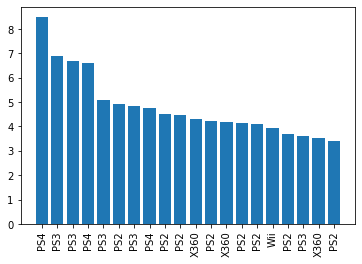

In [6]:
sports_games_1 = sports_games[0:20]
heights = sports_games_1.Global_Sales
bars = sports_games_1.Platform
y_pos = range(len(sports_games_1.Global_Sales))
plt.bar(y_pos, heights)
# Rotation of the bars names
plt.xticks(y_pos, bars, rotation=90)
plt.show()

In [7]:
ps4 = sports_games.loc[sports_games.Platform == 'PS4']
ps4_2016 = ps4.loc[ps4.Year == 2016]
ps4_2016

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
221,222,FIFA 17,PS4,2016,Sports,Electronic Arts,0.28,3.75,0.06,0.69,4.77
1628,1630,Madden NFL 17,PS4,2016,Sports,Electronic Arts,0.92,0.08,0.00,0.23,1.23
2342,2344,EA Sports UFC 2,PS4,2016,Sports,Electronic Arts,0.28,0.47,0.00,0.14,0.89
7575,7577,NHL 17,PS4,2016,Sports,Electronic Arts,0.13,0.04,0.00,0.04,0.20


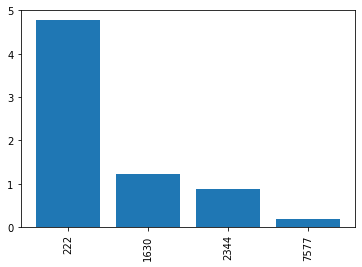

In [8]:
heights = ps4_2016.Global_Sales
bars = ps4_2016.Rank
y_pos = range(len(ps4_2016.Global_Sales))
plt.bar(y_pos, heights)
# Rotation of the bars names
plt.xticks(y_pos, bars, rotation=90)
plt.show()

### Corelation between Ranking and North America Sales with respect to Year for EA_sports

In [9]:
year_EA_sports = sports_games.groupby(['Year'], as_index=False).sum()
year_EA_sports

,Year,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1995,15551,0.22,0.15,0.00,0.03,0.40
1,1996,28099,1.95,1.34,0.04,0.24,3.57
2,1997,27245,8.04,2.98,0.46,0.57,12.06
3,1998,36530,9.05,3.92,0.04,0.58,13.61
4,1999,29616,2.91,1.17,0.00,0.19,4.29
5,2000,53496,7.47,3.07,0.66,0.96,12.16
6,2001,68866,12.69,5.06,0.05,2.13,19.94
7,2002,219833,14.19,7.58,0.41,2.89,25.02
8,2003,177271,15.17,4.57,0.00,1.69,21.52
9,2004,186813,21.24,6.36,0.05,2.47,30.13


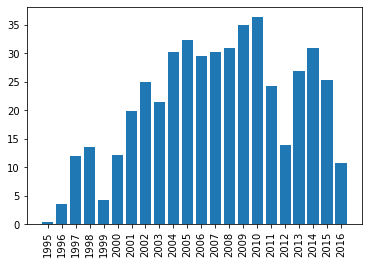

In [10]:
heights = year_EA_sports.Global_Sales
bars = year_EA_sports.Year
y_pos = range(len(year_EA_sports.Global_Sales))
plt.bar(y_pos, heights)
# Rotation of the bars names
plt.xticks(y_pos, bars, rotation=90)
plt.show()

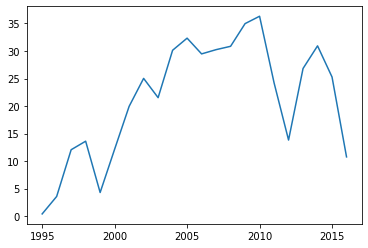

In [11]:
plt.plot(year_EA_sports.Year, year_EA_sports.Global_Sales)
plt.show()

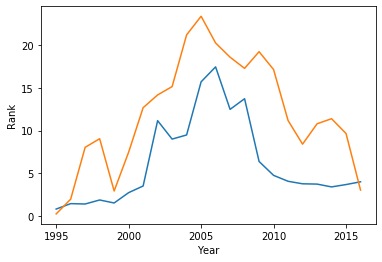

In [12]:
plt.plot(year_EA_sports.Year, year_EA_sports.Rank / 3 ** 9)
plt.plot(year_EA_sports.Year, year_EA_sports.NA_Sales)
plt.xlabel("Year")
plt.ylabel("Rank")
plt.show()

In [13]:
company = df.loc[df.Publisher == '1C Company']
company

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
13057,13059,Men of War: Assault Squad,PC,2011.0,Strategy,1C Company,0.01,0.03,0.0,0.01,0.05
13724,13726,Off-Road Drive,PC,2011.0,Racing,1C Company,0.00,0.03,0.0,0.01,0.04
16449,16452,King's Bounty: Armored Princess,PC,2009.0,Role-Playing,1C Company,0.00,0.01,0.0,0.00,0.01


### Total sales by every publisher from 1995 to 2016

In [14]:
total_sales_1 = df.sort_values("Publisher")
total_sales_1

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
12349,12351,Panzer Tactics,DS,2007.0,Strategy,10TACLE Studios,0.06,0.00,0.00,0.00,0.06
14130,14132,Boulder Dash: Rocks!,DS,2007.0,Puzzle,10TACLE Studios,0.00,0.03,0.00,0.00,0.03
15706,15709,Pirates: Legend of the Black Buccaneer,PS2,2006.0,Adventure,10TACLE Studios,0.01,0.01,0.00,0.00,0.02
16449,16452,King's Bounty: Armored Princess,PC,2009.0,Role-Playing,1C Company,0.00,0.01,0.00,0.00,0.01
13724,13726,Off-Road Drive,PC,2011.0,Racing,1C Company,0.00,0.03,0.00,0.01,0.04
...,...,...,...,...,...,...,...,...,...,...,...
16229,16232,Brothers in Arms: Furious 4,X360,NaN,Shooter,NaN,0.01,0.00,0.00,0.00,0.01
16367,16370,Dance with Devils,PSV,2016.0,Action,NaN,0.00,0.00,0.01,0.00,0.01
16494,16497,Legends of Oz: Dorothy's Return,3DS,2014.0,Puzzle,NaN,0.00,0.01,0.00,0.00,0.01
16543,16546,Driving Simulator 2011,PC,2011.0,Racing,NaN,0.00,0.01,0.00,0.00,0.01


In [15]:
total_sales = total_sales_1.iloc[:,5:]
total_sales.dropna(how='any', inplace = True)
total_sales

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
12349,10TACLE Studios,0.06,0.00,0.00,0.00,0.06
14130,10TACLE Studios,0.00,0.03,0.00,0.00,0.03
15706,10TACLE Studios,0.01,0.01,0.00,0.00,0.02
16449,1C Company,0.00,0.01,0.00,0.00,0.01
13724,1C Company,0.00,0.03,0.00,0.01,0.04
...,...,...,...,...,...,...
14259,imageepoch Inc.,0.00,0.00,0.03,0.00,0.03
10756,inXile Entertainment,0.02,0.06,0.00,0.01,0.10
2409,"mixi, Inc",0.00,0.00,0.86,0.00,0.86
10945,responDESIGN,0.07,0.02,0.00,0.00,0.09


In [16]:
total_sales_new = total_sales.groupby('Publisher', as_index=False).sum()
total_sales_new

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,10TACLE Studios,0.07,0.04,0.00,0.00,0.11
1,1C Company,0.01,0.07,0.00,0.02,0.10
2,20th Century Fox Video Games,1.82,0.10,0.00,0.01,1.94
3,2D Boy,0.00,0.03,0.00,0.01,0.04
4,3DO,6.48,3.04,0.00,0.63,10.12
...,...,...,...,...,...,...
573,id Software,0.02,0.00,0.00,0.00,0.03
574,imageepoch Inc.,0.00,0.00,0.04,0.00,0.04
575,inXile Entertainment,0.02,0.06,0.00,0.01,0.10
576,"mixi, Inc",0.00,0.00,0.86,0.00,0.86


In [17]:
t3 = total_sales_new.sort_values("Global_Sales", ascending = False)
t3

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
359,Nintendo,816.87,418.74,455.42,95.33,1786.56
138,Electronic Arts,595.07,371.27,14.04,129.77,1110.32
21,Activision,429.70,215.53,6.54,75.34,727.46
456,Sony Computer Entertainment,265.22,187.72,74.10,80.45,607.50
525,Ubisoft,253.43,163.32,7.50,50.26,474.72
...,...,...,...,...,...,...
375,Ongakukan,0.00,0.00,0.01,0.00,0.01
96,Commseed,0.00,0.00,0.01,0.00,0.01
495,Takuyo,0.00,0.00,0.01,0.00,0.01
76,Boost On,0.00,0.00,0.01,0.00,0.01


In [18]:
t3_1 = t3.iloc[:10, :]
t3_1

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
359,Nintendo,816.87,418.74,455.42,95.33,1786.56
138,Electronic Arts,595.07,371.27,14.04,129.77,1110.32
21,Activision,429.70,215.53,6.54,75.34,727.46
456,Sony Computer Entertainment,265.22,187.72,74.10,80.45,607.50
525,Ubisoft,253.43,163.32,7.50,50.26,474.72
494,Take-Two Interactive,220.49,118.14,5.83,55.24,399.54
488,THQ,208.77,94.73,5.01,32.14,340.77
275,Konami Digital Entertainment,92.16,69.69,91.30,30.31,283.64
446,Sega,109.40,82.00,57.03,24.52,272.99
347,Namco Bandai Games,69.52,42.63,127.07,14.69,254.09


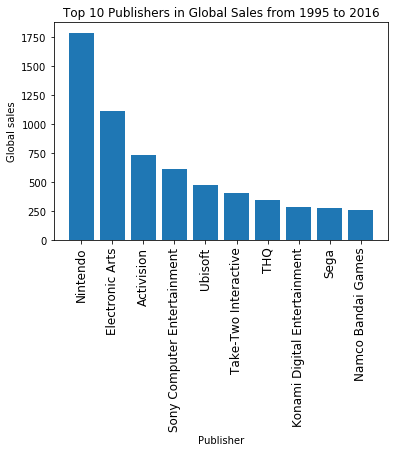

In [19]:
heights = t3_1.Global_Sales
bars = t3_1.Publisher
y_pos = range(len(t3_1.Global_Sales))
plt.bar(y_pos, heights)
# Rotation of the bars names
plt.xticks(y_pos, bars, rotation=90, size=12)
plt.xlabel("Publisher")
plt.ylabel("Global sales")
plt.title("Top 10 Publishers in Global Sales from 1995 to 2016")
plt.show()

### Nintendo total Sales as per Genre 2015 

In [20]:
nsp = df.loc[df.Publisher == 'Nintendo']
nsp = nsp.sort_values('Year')
nsp.dropna(how="any", inplace=True)
nsp

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1839,1841,Donkey Kong Jr.,NES,1983.0,Platform,Nintendo,0.33,0.07,0.70,0.01,1.11
763,765,Mahjong,NES,1983.0,Misc,Nintendo,0.01,0.00,2.13,0.00,2.14
421,422,Baseball,NES,1983.0,Sports,Nintendo,0.73,0.10,2.35,0.02,3.20
700,702,Mario Bros.,NES,1983.0,Platform,Nintendo,0.51,0.12,1.63,0.02,2.28
1861,1863,Popeye,NES,1983.0,Platform,Nintendo,0.51,0.12,0.45,0.02,1.10
...,...,...,...,...,...,...,...,...,...,...,...
14968,14971,Teddy Together,3DS,2016.0,Simulation,Nintendo,0.00,0.02,0.00,0.00,0.02
4658,4660,Hyrule Warriors,3DS,2016.0,Action,Nintendo,0.16,0.12,0.11,0.03,0.42
4261,4263,Mario & Sonic at the Rio 2016 Olympic Games,3DS,2016.0,Action,Nintendo,0.04,0.16,0.24,0.01,0.46
5288,5290,Star Fox: Zero,WiiU,2016.0,Shooter,Nintendo,0.16,0.10,0.07,0.03,0.35


In [21]:
def year_nin(y):
    return nsp.loc[nsp.Year == y]
y_2015 = year_nin(2015)
y_2015

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2965,2967,Nintendo Presents: New Style Boutique 2 - Fash...,3DS,2015.0,Misc,Nintendo,0.01,0.61,0.02,0.04,0.69
13887,13889,Famicom Remix Best Choice,3DS,2015.0,Action,Nintendo,0.00,0.00,0.04,0.00,0.04
16456,16459,Art Academy: Home Studio,WiiU,2015.0,Misc,Nintendo,0.00,0.00,0.01,0.00,0.01
12373,12375,Mario vs. Donkey Kong: Tipping Stars,3DS,2015.0,Puzzle,Nintendo,0.00,0.00,0.06,0.00,0.06
2882,2884,Rhythm Heaven: The Best+,3DS,2015.0,Misc,Nintendo,0.00,0.00,0.71,0.00,0.71
16357,16360,Mario vs. Donkey Kong: Tipping Stars,WiiU,2015.0,Puzzle,Nintendo,0.00,0.00,0.01,0.00,0.01
12426,12428,Devil's Third,WiiU,2015.0,Action,Nintendo,0.04,0.02,0.00,0.01,0.06
1702,1704,Pokemon Super Mystery Dungeon,3DS,2015.0,Role-Playing,Nintendo,0.46,0.31,0.33,0.08,1.19
2771,2773,Mario & Luigi: Paper Jam,3DS,2015.0,Role-Playing,Nintendo,0.16,0.30,0.25,0.04,0.74
1526,1528,Yoshi's Woolly World,WiiU,2015.0,Platform,Nintendo,0.61,0.47,0.11,0.10,1.29


In [22]:
y_2015_g = y_2015.sort_values("Genre")
y_2015_g = y_2015_g.drop(['Year', 'Rank'], axis=1)
y_2015_g

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
13887,Famicom Remix Best Choice,3DS,Action,Nintendo,0.00,0.00,0.04,0.00,0.04
10992,Pokemon Rumble World,3DS,Action,Nintendo,0.00,0.01,0.08,0.00,0.09
7866,Disney Magic World 2,3DS,Action,Nintendo,0.00,0.00,0.19,0.00,0.19
6977,Girls Mode 3: Kirakira Code,3DS,Action,Nintendo,0.00,0.00,0.23,0.00,0.23
680,The Legend of Zelda: Majora's Mask 3D,3DS,Action,Nintendo,1.14,0.54,0.47,0.17,2.32
12426,Devil's Third,WiiU,Action,Nintendo,0.04,0.02,0.00,0.01,0.06
1850,The Legend of Zelda: Tri Force Heroes,3DS,Action,Nintendo,0.52,0.33,0.17,0.08,1.10
2965,Nintendo Presents: New Style Boutique 2 - Fash...,3DS,Misc,Nintendo,0.01,0.61,0.02,0.04,0.69
4657,Animal Crossing: Amiibo Festival,WiiU,Misc,Nintendo,0.19,0.11,0.09,0.03,0.42
1207,Mario Party 10,WiiU,Misc,Nintendo,0.69,0.50,0.24,0.11,1.55


In [23]:
y15g_s = y_2015_g.groupby("Genre", as_index=False).sum()
y15g_s

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Action,1.70,0.90,1.18,0.26,4.03
1,Misc,0.89,1.22,1.08,0.18,3.39
2,Platform,2.11,1.56,1.22,0.36,5.24
3,Puzzle,0.05,0.05,0.52,0.01,0.64
4,Role-Playing,2.21,1.40,1.60,0.36,5.56
5,Shooter,1.55,1.15,1.44,0.43,4.57
6,Simulation,0.47,1.00,1.39,0.12,2.98
7,Sports,0.13,0.16,0.13,0.03,0.45
8,Strategy,0.14,0.05,0.01,0.02,0.22


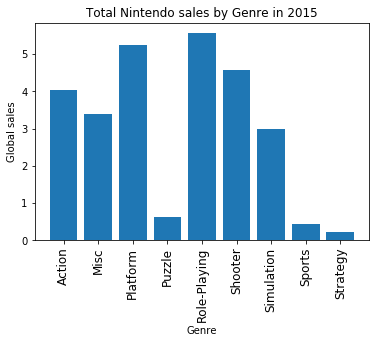

In [24]:
heights = y15g_s.Global_Sales
bars = y15g_s.Genre
y_pos = range(len(y15g_s.Global_Sales))
plt.bar(y_pos, heights)
# Rotation of the bars names
plt.xticks(y_pos, bars, rotation=90, size=12)
plt.xlabel("Genre")
plt.ylabel("Global sales")
plt.title("Total Nintendo sales by Genre in 2015")
plt.show()

### 1. Define - decision tree or random forest or new model
### 2. Fit - Capture patterns from provied data (train)
### 3. Prediction - model - test -result
### 4. Evaluate - accuracy

In [25]:
pdf = df.loc[df.Publisher == "Nintendo"]
pdf

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16269,16272,Slide Adventure: Mag Kid,DS,2007.0,Action,Nintendo,0.00,0.00,0.01,0.00,0.01
16357,16360,Mario vs. Donkey Kong: Tipping Stars,WiiU,2015.0,Puzzle,Nintendo,0.00,0.00,0.01,0.00,0.01
16456,16459,Art Academy: Home Studio,WiiU,2015.0,Misc,Nintendo,0.00,0.00,0.01,0.00,0.01
16473,16476,Captain Rainbow,Wii,2008.0,Adventure,Nintendo,0.00,0.00,0.01,0.00,0.01


In [26]:
pdf = pdf.sort_values("Year")
pdf

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1839,1841,Donkey Kong Jr.,NES,1983.0,Platform,Nintendo,0.33,0.07,0.70,0.01,1.11
763,765,Mahjong,NES,1983.0,Misc,Nintendo,0.01,0.00,2.13,0.00,2.14
421,422,Baseball,NES,1983.0,Sports,Nintendo,0.73,0.10,2.35,0.02,3.20
700,702,Mario Bros.,NES,1983.0,Platform,Nintendo,0.51,0.12,1.63,0.02,2.28
1861,1863,Popeye,NES,1983.0,Platform,Nintendo,0.51,0.12,0.45,0.02,1.10
...,...,...,...,...,...,...,...,...,...,...,...
5508,5510,Custom Robo,N64,NaN,Role-Playing,Nintendo,0.00,0.00,0.29,0.04,0.33
11409,11411,Zero: Tsukihami no Kamen,Wii,NaN,Action,Nintendo,0.00,0.00,0.08,0.00,0.08
14997,15000,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.00,0.00,0.02,0.00,0.02
14999,15002,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.00,0.00,0.02,0.00,0.02


In [27]:
pdf.dropna(how="any", inplace=True)
pdf

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1839,1841,Donkey Kong Jr.,NES,1983.0,Platform,Nintendo,0.33,0.07,0.70,0.01,1.11
763,765,Mahjong,NES,1983.0,Misc,Nintendo,0.01,0.00,2.13,0.00,2.14
421,422,Baseball,NES,1983.0,Sports,Nintendo,0.73,0.10,2.35,0.02,3.20
700,702,Mario Bros.,NES,1983.0,Platform,Nintendo,0.51,0.12,1.63,0.02,2.28
1861,1863,Popeye,NES,1983.0,Platform,Nintendo,0.51,0.12,0.45,0.02,1.10
...,...,...,...,...,...,...,...,...,...,...,...
14968,14971,Teddy Together,3DS,2016.0,Simulation,Nintendo,0.00,0.02,0.00,0.00,0.02
4658,4660,Hyrule Warriors,3DS,2016.0,Action,Nintendo,0.16,0.12,0.11,0.03,0.42
4261,4263,Mario & Sonic at the Rio 2016 Olympic Games,3DS,2016.0,Action,Nintendo,0.04,0.16,0.24,0.01,0.46
5288,5290,Star Fox: Zero,WiiU,2016.0,Shooter,Nintendo,0.16,0.10,0.07,0.03,0.35


In [28]:
pdf = pdf.groupby("Year", as_index=False).sum()
pdf

,Year,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1983.0,7404,2.32,0.46,8.10,0.08,10.96
1,1984.0,8921,32.57,1.95,10.36,0.67,45.56
2,1985.0,10171,32.48,4.54,12.02,0.91,49.95
3,1986.0,6648,6.73,1.73,7.45,0.26,16.18
4,1987.0,2127,5.13,1.18,5.46,0.18,11.95
5,1988.0,2870,21.23,6.15,8.13,0.93,36.44
6,1989.0,7080,39.81,7.60,15.06,1.40,63.88
7,1990.0,5983,19.75,6.42,8.08,1.22,35.49
8,1991.0,43298,6.95,2.47,6.22,0.33,15.97
9,1992.0,13514,18.48,6.08,12.66,0.91,38.11


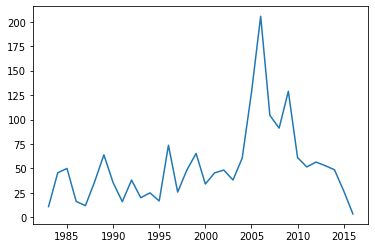

In [29]:
plt.plot(pdf.Year,pdf.Global_Sales)
plt.show()

### Decision Tree Regression

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
y = pdf.Global_Sales
pdf_features = ['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales']
X = pdf[pdf_features]
train_X, val_X, train_y, val_y = train_test_split(X,y, random_state=0)
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    pdf_model = DecisionTreeRegressor(max_leaf_nodes = max_leaf_nodes, random_state=0)
    pdf_model.fit(train_X,train_y)
    pdf_preds = pdf_model.predict(val_X)
    mae = mean_absolute_error(val_y, pdf_preds)
    return(mae)
for max_leaf_nodes in [5,50,500,5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d \t\t Mean absolute error: %d" %(max_leaf_nodes,my_mae))


Max leaf nodes: 5 		 Mean absolute error: 10
Max leaf nodes: 50 		 Mean absolute error: 7
Max leaf nodes: 500 		 Mean absolute error: 7
Max leaf nodes: 5000 		 Mean absolute error: 7


In [31]:
pdf_model = DecisionTreeRegressor(max_leaf_nodes = 50, random_state=0)
pdf_model.fit(train_X,train_y)
pdf_preds = pdf_model.predict(val_X)
maed = mean_absolute_error(val_y, pdf_preds)
pdf_preds

array([ 25.8 ,  38.11, 104.18,  25.8 ,  45.56, 104.18,  56.47,  60.65,
        15.97])

In [32]:
val_y1 = pd.DataFrame(val_y) 
val_y1

,Global_Sales
11,24.99
20,38.14
25,91.22
17,34.05
2,49.95
26,128.89
31,48.65
16,65.33
10,20.04


In [33]:
val_X.index = range(9)
val_X

,Year,NA_Sales,EU_Sales,JP_Sales
0,1994.0,10.96,4.19,9.00
1,2003.0,20.15,7.08,9.85
2,2008.0,38.83,25.13,19.96
3,2000.0,15.00,6.42,10.53
4,1985.0,32.48,4.54,12.02
5,2009.0,53.15,36.18,29.82
6,2014.0,18.01,11.37,16.12
7,1999.0,34.18,13.74,15.88
8,1993.0,9.53,3.09,6.99


In [34]:
pdf_preds_df = pd.DataFrame(data=pdf_preds, columns=['preds'])
pdf_preds_df

,preds
0,25.80
1,38.11
2,104.18
3,25.80
4,45.56
5,104.18
6,56.47
7,60.65
8,15.97


In [35]:
val_X1 = pd.DataFrame(val_X, columns=['Year'])
val_X1.sort_values('Year', inplace=True)
val_X1

,Year
4,1985.0
8,1993.0
0,1994.0
7,1999.0
3,2000.0
1,2003.0
2,2008.0
5,2009.0
6,2014.0


### Problem arised is that we gave a train_test_split algorithm to split our data into train and test. It chose randomly without considering timeseries. But still we got good predictions as seen in the graph below.

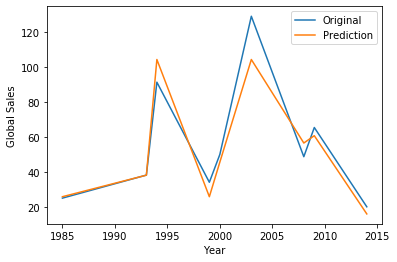

In [36]:
plt.plot(val_X1.Year, val_y1)
plt.plot(val_X1.Year, pdf_preds_df.preds)
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.legend(['Original', 'Prediction'])
plt.show()

In [37]:
# accuracy score
# import export_graphviz 
from sklearn.tree import export_graphviz  
  
# export the decision tree to a tree.dot file 
# for visualizing the plot easily anywhere 
export_graphviz(pdf_model, out_file ='tree.dot', feature_names =['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales'])

### Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression
l_model = LinearRegression()
l_model.fit(train_X,train_y)
preds_l = l_model.predict(val_X)
preds_l

array([ 24.53508667,  38.39989377,  90.23228155,  32.90020316,
        49.69719528, 128.15804331,  47.31666589,  66.88742941,
        19.85831305])

In [39]:
preds_l1 = pd.DataFrame(data=preds_l, columns=['preds'])
preds_l1

,preds
0,24.535087
1,38.399894
2,90.232282
3,32.900203
4,49.697195
5,128.158043
6,47.316666
7,66.887429
8,19.858313


In [40]:
val_y

11     24.99
20     38.14
25     91.22
17     34.05
2      49.95
26    128.89
31     48.65
16     65.33
10     20.04
Name: Global_Sales, dtype: float64

In [41]:
scorel = l_model.score(train_X,train_y)
mael = mean_absolute_error(val_y, preds_l)
print('Mean absolute error: \t', mael)
print('Linear Regression score: \t', scorel)

Mean absolute error: 	 0.7677260296367128
Linear Regression score: 	 0.9997249622389955


### Linear Regression is perfect for this data at 99% accuracy

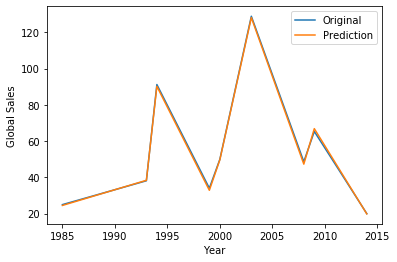

In [42]:
plt.plot(val_X1.Year, val_y1)
plt.plot(val_X1.Year, preds_l1.preds)
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.legend(['Original', 'Prediction'])
plt.show()

### Comparing Decision Tree Regression and Linear Regression

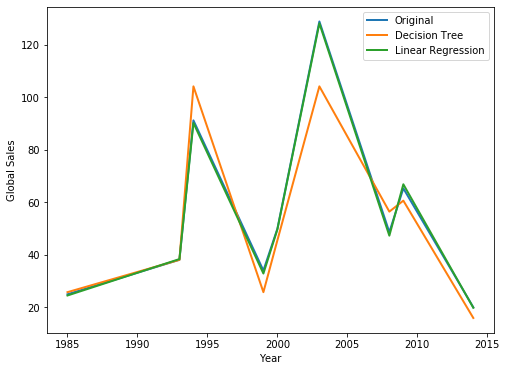

In [43]:
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["figure.figsize"] = [8, 6]
plt.plot(val_X1.Year, val_y1)
plt.plot(val_X1.Year, pdf_preds_df.preds)
plt.plot(val_X1.Year, preds_l1.preds)
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.legend(['Original', 'Decision Tree', 'Linear Regression'])
plt.show()

### Randaom Forest Regression

In [44]:
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor(n_estimators=200, random_state=1)
forest_model.fit(train_X, train_y)
predsf = forest_model.predict(val_X)
predsf

array([ 25.9034 ,  42.2148 ,  86.4812 ,  36.2702 ,  44.86015, 113.899  ,
        55.6424 ,  62.4709 ,  20.5522 ])

In [45]:
mae_forest = mean_absolute_error(val_y, predsf)
mae_forest

4.7101944444444035

In [46]:
preds_f = pd.DataFrame(data=predsf, columns=['preds'])
preds_f

,preds
0,25.90340
1,42.21480
2,86.48120
3,36.27020
4,44.86015
5,113.89900
6,55.64240
7,62.47090
8,20.55220


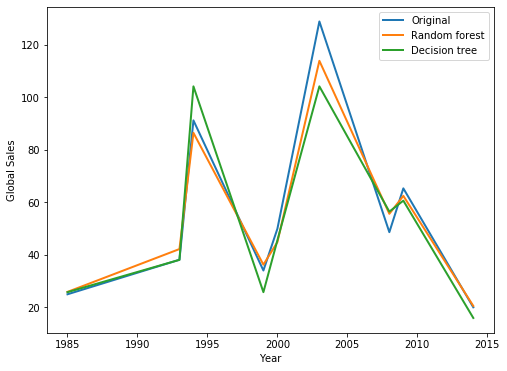

In [47]:
plt.plot(val_X1.Year, val_y1)
plt.plot(val_X1.Year, preds_f.preds)
plt.plot(val_X1.Year, pdf_preds_df.preds)
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.legend(['Original', 'Random forest', 'Decision tree'])
plt.show()

In [48]:
print("MAE of Linear Regrression: %d \n MAE of Decision Tree Regressor: %d \n MAE of Random Forest Regressor: %d" %(mael, maed, mae_forest))

MAE of Linear Regrression: 0 
 MAE of Decision Tree Regressor: 7 
 MAE of Random Forest Regressor: 4
